# STAGE 1: EDA AND PREPROCESSING

# Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the dataset and selecting relavant columns

In [2]:
# Loading the dataset
credit_df = pd.read_csv("BankChurners_train_phase1and2.csv")

# Dropping the irrelevant columns
credit_df = credit_df.drop(credit_df.columns[-2:], axis = 1)

# Renaming columns with relavant names
column_replacements = {
    "CLIENTNUM" : "client_id",
    "Attrition_Flag" : "attrition_flag",
    "Customer_Age" : "age",
    "Gender" : "gender",
    "Dependent_count" : "dependents",
    "Education_Level" : "education_level",
    "Marital_Status" : "marital_status",
    "Income_Category" : "income_category",
    "Card_Category" : "card_category",
    "Months_on_book" : "customer_months",
    "Total_Relationship_Count" : "no_of_affiliated_products",
    "Months_Inactive_12_mon" : "inactive_months_12",
    "Contacts_Count_12_mon" : "times_contacted_12",
    "Credit_Limit" : "credit_limit",
    "Total_Revolving_Bal" : "revolving_balance",
    "Avg_Open_To_Buy" : "12_month_avg_open_to_buy_credit",
    "Total_Amt_Chng_Q4_Q1" : "Q4_Q1_transaction_amt_change",
    "Total_Trans_Amt" : "12_months_transaction_amt_total",
    "Total_Trans_Ct" : "12_months_number_of_transactions",
    "Total_Ct_Chng_Q4_Q1" : "Q4_Q1_number_of_transactions_change",
    "Avg_Utilization_Ratio" : "avg_util_ratio"
}
credit_df = credit_df.rename(columns=column_replacements)

credit_df

,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Exploratory Data Analysis

Taking a look into the data to understand what the data looks like, what are the steps needed to preprocess and the nature of the numerical columns.

In [3]:
credit_df_eda = credit_df.drop(columns = 'client_id')
credit_df_eda

,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### EDA Step 1: Checking the statistics of the numeric columns

One of the first steps in EDA is to get the basic statistics of the numerical columns. Looking at these descriptive statistics enables further analysis.

In [4]:
credit_df_eda.describe()

,age,dependents,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### EDA Step 2: Checking correlation between the numeric columns

Checking the correlation between numeric columns will aid in determining important features for the model that needs to be created. It is an important part of feature selection.

From the plot, the following inferences can be made:
1) customer_months (number of months the bank has a relationship with the customer) and age are highly correlated.  
2) 12_months_transaction_amt_total (number of transactions in the last months) is highly correlated to 12_months_number_of_transactions.  
3) Not many columns are negatively correlated, but we see that there is a slight negative correlation between credit_limit and avg_util_ratio

We can also vizualise relationships in a pair plot.

In [5]:
# Generating the correlation matrix
correlation_matrix = credit_df_eda[['age','dependents','customer_months','no_of_affiliated_products','inactive_months_12','times_contacted_12','credit_limit', 'revolving_balance', '12_months_transaction_amt_total', '12_months_number_of_transactions', 'avg_util_ratio', 'Q4_Q1_transaction_amt_change', 'Q4_Q1_number_of_transactions_change']].corr()
correlation_matrix

,age,dependents,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_months_transaction_amt_total,12_months_number_of_transactions,avg_util_ratio,Q4_Q1_transaction_amt_change,Q4_Q1_number_of_transactions_change
age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,-0.046446,-0.067097,0.007114,-0.062042,-0.012143
dependents,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.025046,0.049912,-0.037135,-0.035439,0.011087
customer_months,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,-0.038591,-0.049819,-0.007541,-0.048959,-0.014072
no_of_affiliated_products,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.347229,-0.241891,0.067663,0.050119,0.040831
inactive_months_12,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.036982,-0.042787,-0.007503,-0.032247,-0.038989
times_contacted_12,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,-0.112774,-0.152213,-0.055471,-0.024445,-0.094997
credit_limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.171730,0.075927,-0.482965,0.012813,-0.002020
revolving_balance,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,0.064370,0.056060,0.624022,0.058174,0.089861
12_months_transaction_amt_total,-0.046446,0.025046,-0.038591,-0.347229,-0.036982,-0.112774,0.171730,0.064370,1.000000,0.807192,-0.083034,0.039678,0.085581
12_months_number_of_transactions,-0.067097,0.049912,-0.049819,-0.241891,-0.042787,-0.152213,0.075927,0.056060,0.807192,1.000000,0.002838,0.005469,0.112324


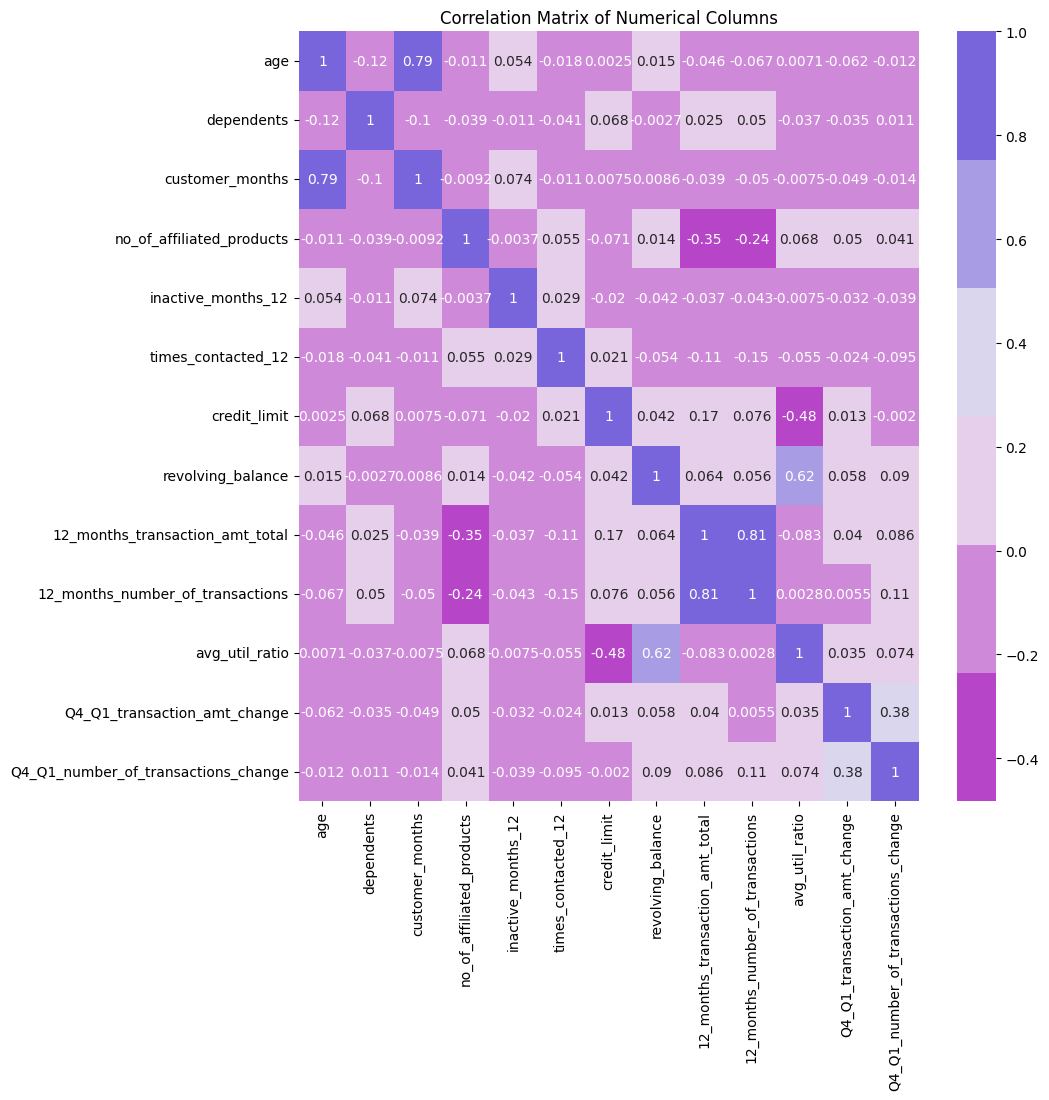

In [6]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize = (10, 10))
plt.title(label="Correlation Matrix of Numerical Columns")
cmap = sns.diverging_palette(300, 270, center = "light")
sns.heatmap(correlation_matrix, annot = True, cmap = cmap)
plt.show()

### EDA Step 3: Checking values present in categorical variables

Delving into the data of categorical variables can help identify anamolies, and also patters between each other.

In [7]:
cat_variables = ["attrition_flag", "gender", "education_level", "marital_status", "income_category", "card_category"]
for i in credit_df_eda.columns:
    if(i in cat_variables):
        print("Values in " + i + " attribute:\n" + str(credit_df_eda[i].value_counts()) + "\n")

Values in attrition_flag attribute:
Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

Values in gender attribute:
F    5358
M    4769
Name: gender, dtype: int64

Values in education_level attribute:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

Values in marital_status attribute:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

Values in income_category attribute:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

Values in card_category attribute:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64



### EDA Step 4: Plotting histograms of categorical values

Plotting histograms of categorical variables allows us to detect and explore patterns in the data.  
The following inferences can be made from the plots:  
1) There are a lot of categorical values containing the value "Unknown". The value counts of these unknown values is very high. Therefore, they will be have to handled before fitting the data to any model or using it to display any actionable insights.  
2) Higher education levels have lower value counts. This is something that is expected in the real world, so the truthfulness of the data can be validated.  
3) A majority of the income category values are "Less than $40K", which is in line with the most frequently occuring card type, which is "Blue" (lower credit limit). This also somewhat validates the dataset's truthfulness. 

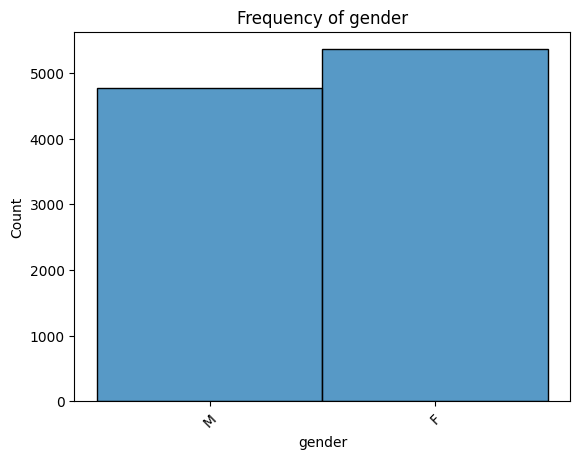

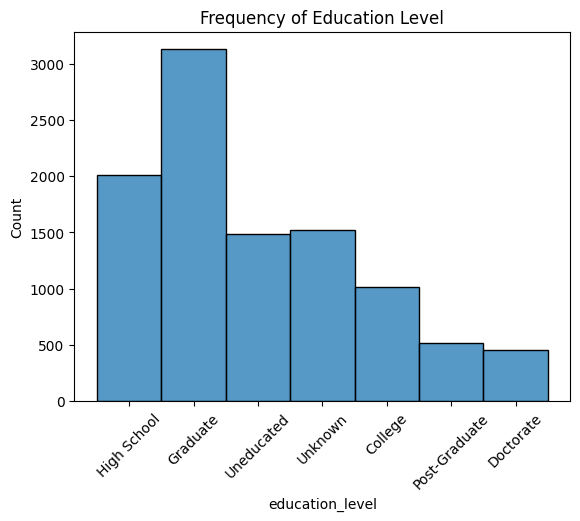

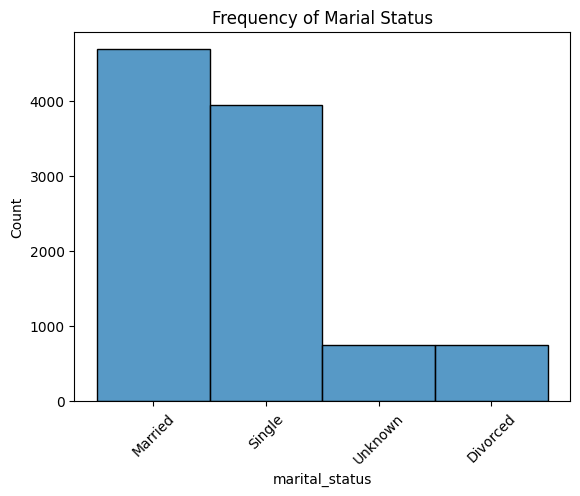

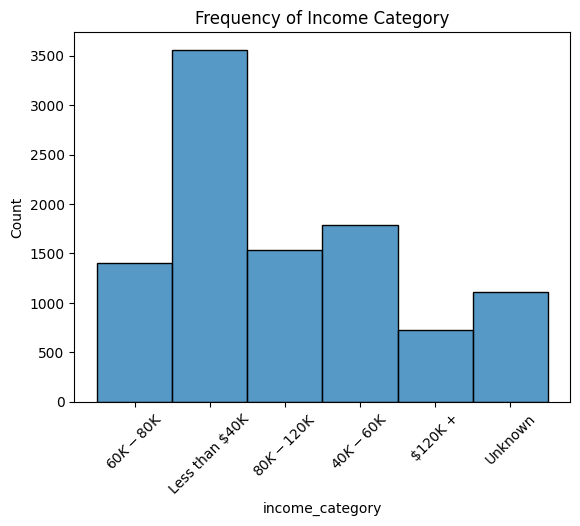

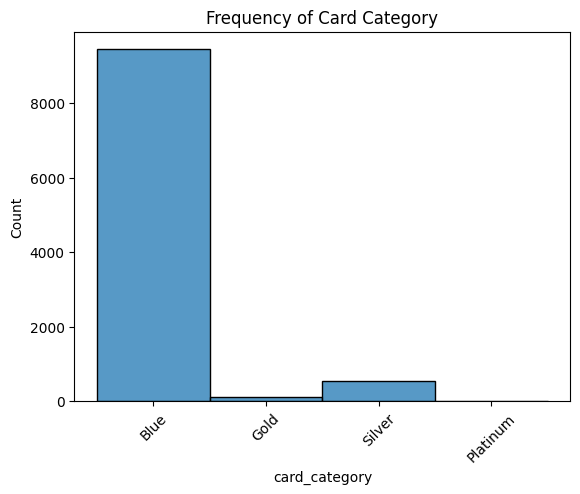

In [8]:
# Plotting histograms of categorical variables using Seaborn
sns.histplot(credit_df_eda["gender"])
plt.title(label="Frequency of gender")
plt.xticks(rotation=45)
plt.show()
sns.histplot(data=credit_df_eda["education_level"])
plt.title(label="Frequency of Education Level")
plt.xticks(rotation=45)
plt.show()
sns.histplot(credit_df_eda["marital_status"])
plt.title(label="Frequency of Marial Status")
plt.xticks(rotation=45)
plt.show()
sns.histplot(credit_df_eda["income_category"])
plt.title(label="Frequency of Income Category")
plt.xticks(rotation=45)
plt.show()
sns.histplot(credit_df_eda["card_category"])
plt.title(label="Frequency of Card Category")
plt.xticks(rotation=45)
plt.show()

### EDA Step 5: Exploring relationships between categorical variables

Some categorical variables may be related (for example, education level and income category). Uncovering these relationships may help us handle "Unknown" values or provide further insight into the data. Some combinations of categorical variables that may have relationships that can be explored are:
1) education_level and income_category  
2) income_category and card_category  
3) education_level and card_category  
A strategy to explore these relationships could be to aggregate them and see if there is a correlation between the variables' ordinality. For example, it could be suspected that education_level and income_category are correlated, in that a higher education_level corresponds to a higher income_category. To verify if this suspicion is true or not, we can aggregate them and look at value counts.  

Inferences:  
* There is no real relationship between education level and income category, since the number of clients are identically distributed across both variables.
* Most of the customers hold blue cards, regardless of their income or education level, but otherwise there is no real relationship between the two variables.

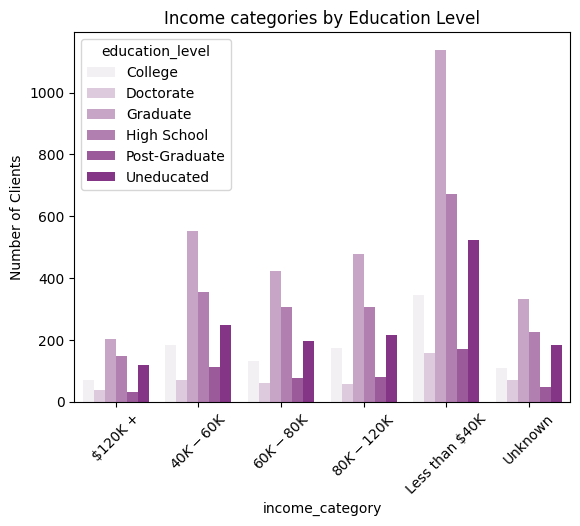

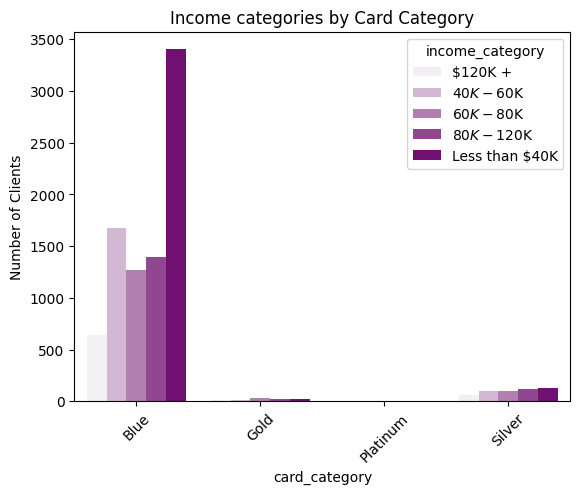

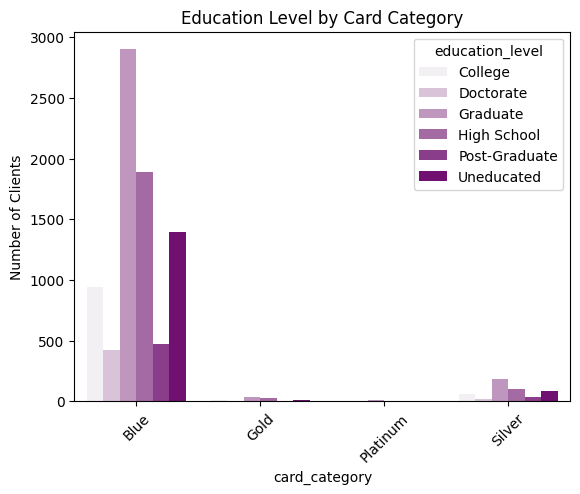

In [9]:
# Calculating value counts of education_level by income category
edu_inc = credit_df_eda[(credit_df_eda["education_level"] != "Unknown") & (credit_df_eda["education_level"] != "Unknown")]
edu_inc = edu_inc.groupby(["education_level", "income_category"], as_index = False)["attrition_flag"].agg("count")

# Plotting the Income categories by education_level
plt.xticks(rotation=45)
plt.title("Income categories by Education Level")
sns.barplot(data = edu_inc, x = "income_category", y = "attrition_flag", hue = "education_level", palette = sns.light_palette(color=("purple"), n_colors=7))
plt.ylabel("Number of Clients")
plt.show()

# Calculating value counts of income_category by card category
inc_card = credit_df_eda[(credit_df_eda["income_category"] != "Unknown")]
inc_card = inc_card.groupby(["card_category", "income_category"], as_index = False)["attrition_flag"].agg("count")

# Plotting the Income categories by Card Category
plt.xticks(rotation=45)
plt.title("Income categories by Card Category")
sns.barplot(data = inc_card, x = "card_category", y = "attrition_flag", hue = "income_category", palette = sns.light_palette(color=("purple"), n_colors=5))
plt.ylabel("Number of Clients")
plt.show()

# Calculating value counts of income_category by education level
inc_card = credit_df_eda[(credit_df_eda["education_level"] != "Unknown")]
inc_card = inc_card.groupby(["card_category", "education_level"], as_index = False)["attrition_flag"].agg("count")

# Plotting the Income categories by Education Level
plt.xticks(rotation=45)
plt.title("Education Level by Card Category")
sns.barplot(data = inc_card, x = "card_category", y = "attrition_flag", hue = "education_level", palette = sns.light_palette(color=("purple"), n_colors=6))
plt.ylabel("Number of Clients")
plt.show()

### EDA Step 6: Exploring relationship between credit limit and education level

It is possible that someone with a higher education level might have a higer credit limit. It could be benefitial to identify such a relationship so that we may handle "Unknown" values in education_level.  
From the graph below, we see that there is no such relationship evident.

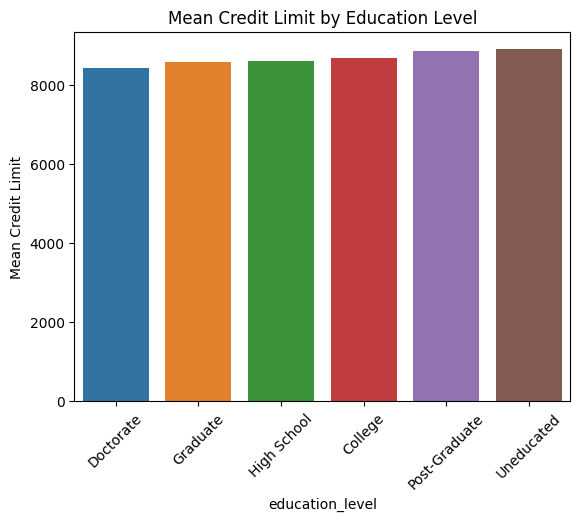

In [10]:
# Calculating mean credit limit for each education level
temp_df = credit_df[credit_df["education_level"] != "Unknown"]
temp_df = temp_df.groupby(["education_level"], as_index = False)["credit_limit"].agg("mean").sort_values(by = "credit_limit")

# Plotting a graph of mean credit limit by education level
plt.xticks(rotation=45)
plt.title("Mean Credit Limit by Education Level")
sns.barplot(data = temp_df, x = "education_level", y = "credit_limit")
plt.ylabel("Mean Credit Limit")
plt.show()

### EDA Step 7: Exploring relationship between credit limit and income category

Most credit card issuers issue a higher credit limit to customers with a higher income category. Since, we need to handle the "Unknown" values in the income_category attribute, it makes sense to see if credit_limit and income_category are related, so that we can handle "Unknown" values better. Calculating the mean values of credit limit shows us that higher income categories have higher credit limit. The graph below shows us that there is a clear relationship between the two: higher income translates to a higher credit score

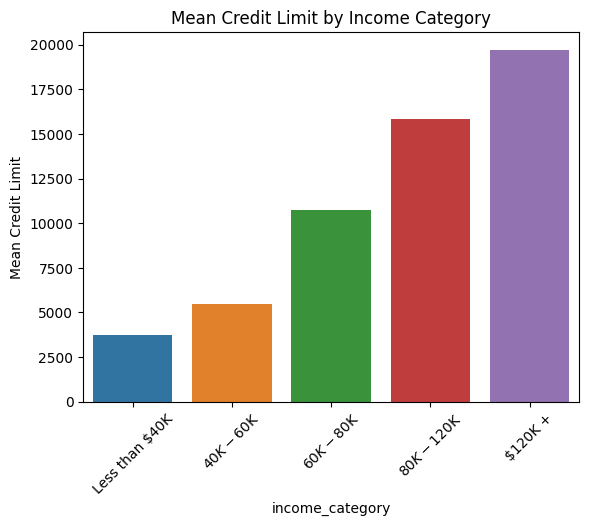

In [11]:
# Calculating mean credit limit for each income category
temp_df = credit_df[credit_df["income_category"] != "Unknown"]
temp_df = temp_df.groupby(["income_category"], as_index = False)["credit_limit"].agg("mean").sort_values(by = "credit_limit")

# Plotting a graph of mean credit limit for each income category
plt.xticks(rotation=45)
plt.title("Mean Credit Limit by Income Category")
sns.barplot(data = temp_df, x = "income_category", y = "credit_limit")
plt.ylabel("Mean Credit Limit")
plt.show()

### EDA Step 8: Detecting outliers in credit_limit

Since the credit_limit attribute is going to be used to determine "Unknown" values in income_category, it is crucial to delve into this attribute and determine if there are any outliers. Looking at the boxplot shows us that there are many outliers (766). However, we cannot remove them since high the high income range may be a contributing factor to the high credit limits that we see. Filtering the apparent outliers on low incomes shows us that there are no such records.  
To confirm this, we can use z-score to detect outliers.  
The Z-score calculation below shows us that there are no outliers.

<AxesSubplot: xlabel='credit_limit'>

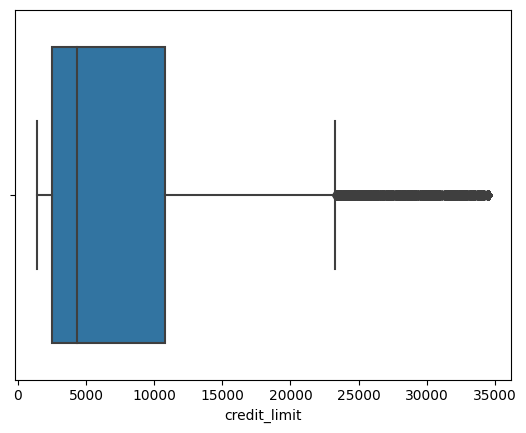

In [12]:
# Creating a box plot to detect outliers
temp_df1 = credit_df_eda[credit_df_eda["income_category"] != "Unknown"]
sns.boxplot(x=temp_df1["credit_limit"])

In [13]:
# Determining the upper and lower limit of valid credit limit by Tukey's method
lower_limit = 2555 - (1.5 * 2555) # the lower limit of valid credit limits
upper_limit = 11067.5 + (1.5 * 11067.5) # the upper limit of valid credit limits

# Filtering all records that fall outside the limits
credit_df_eda[(credit_df_eda["credit_limit"] < lower_limit) | (credit_df_eda["credit_limit"] > upper_limit)]

,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
16,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,2,3,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078
40,Existing Customer,45,M,3,Graduate,Single,$80K - $120K,Blue,41,2,2,2,32426.0,578,31848.0,1.042,1109,28,0.474,0.018
45,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,36,4,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
10100,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10104,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,36,3,2,2,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059
10110,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032


In [14]:
# Z-score test to detect outliers
# Defining the upper and lower limits for z-score test
lower_limit = np.mean(credit_df_eda["credit_limit"]) - 3 * np.std(credit_df_eda["credit_limit"]) 
upper_limit = np.mean(credit_df_eda["credit_limit"]) + 3 * np.std(credit_df_eda["credit_limit"])

# Filtering all records that fall outside the limits
print(credit_df_eda[(credit_df_eda["credit_limit"] < lower_limit) | (credit_df_eda["credit_limit"] > upper_limit)])

# We can confirm the z-score test by filtering the outliers detected by Tukey's method on higher income categories
print(credit_df_eda[((credit_df_eda["credit_limit"] < lower_limit) | (credit_df_eda["credit_limit"] > upper_limit)) & (credit_df_eda["income_category"] == "Less than $40K")])

Empty DataFrame
Columns: [attrition_flag, age, gender, dependents, education_level, marital_status, income_category, card_category, customer_months, no_of_affiliated_products, inactive_months_12, times_contacted_12, credit_limit, revolving_balance, 12_month_avg_open_to_buy_credit, Q4_Q1_transaction_amt_change, 12_months_transaction_amt_total, 12_months_number_of_transactions, Q4_Q1_number_of_transactions_change, avg_util_ratio]
Index: []
Empty DataFrame
Columns: [attrition_flag, age, gender, dependents, education_level, marital_status, income_category, card_category, customer_months, no_of_affiliated_products, inactive_months_12, times_contacted_12, credit_limit, revolving_balance, 12_month_avg_open_to_buy_credit, Q4_Q1_transaction_amt_change, 12_months_transaction_amt_total, 12_months_number_of_transactions, Q4_Q1_number_of_transactions_change, avg_util_ratio]
Index: []


### EDA Step 9: Detecting outliers in 12_month_avg_open_to_buy_credit

The max value of 12_month_avg_open_to_buy_credit deviates highly from the mean value, indicating the presence of outliers. We can use the methods in EDA step 8 to determine outliers similarly.  
Upon initial analysis, like before, there are many outliers. However, since a line of credit is also generally offered to customers that are of a higher income range. To reaffirm the presence of outliers, we should also use the Z-test.  
Further analysis of the data reveals that there are no outliers.

<AxesSubplot: xlabel='12_month_avg_open_to_buy_credit'>

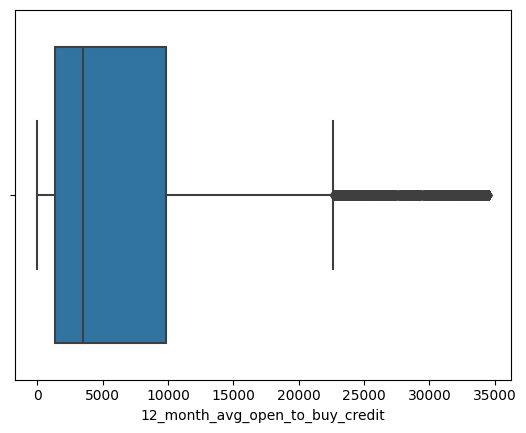

In [15]:
# Creating a box plot to detect outliers
sns.boxplot(x=credit_df_eda["12_month_avg_open_to_buy_credit"])

In [16]:
# Determining the upper and lower limit of valid credit limit by Tukey's method
lower_limit = 1324.5 - (1.5 * 1324.5) # the lower limit of valid credit limits
upper_limit = 9859 + (1.5 * 9859) # the upper limit of valid credit limits

# Filtering all records that fall outside the limits
credit_df_eda[(credit_df_eda["12_month_avg_open_to_buy_credit"] < lower_limit) | (credit_df_eda["12_month_avg_open_to_buy_credit"] > upper_limit)]

,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
16,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,2,3,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078
40,Existing Customer,45,M,3,Graduate,Single,$80K - $120K,Blue,41,2,2,2,32426.0,578,31848.0,1.042,1109,28,0.474,0.018
45,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.0,0,34516.0,1.621,1444,28,1.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,Attrited Customer,55,M,3,Graduate,Single,$120K +,Silver,36,4,3,4,34516.0,0,34516.0,1.007,9931,70,0.750,0.000
10100,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,4,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10104,Existing Customer,51,M,3,Graduate,Single,$60K - $80K,Silver,36,3,2,2,29663.0,1743,27920.0,0.667,14638,93,0.722,0.059
10110,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032


In [17]:
# Z-score test to detect outliers
# Defining the upper and lower limits for z-score test
lower_limit = np.mean(credit_df_eda["12_month_avg_open_to_buy_credit"]) - 3 * np.std(credit_df_eda["12_month_avg_open_to_buy_credit"]) 
upper_limit = np.mean(credit_df_eda["12_month_avg_open_to_buy_credit"]) + 3 * np.std(credit_df_eda["12_month_avg_open_to_buy_credit"])

# Filtering all records that fall outside the limits
print(credit_df_eda[(credit_df_eda["12_month_avg_open_to_buy_credit"] < lower_limit) | (credit_df_eda["12_month_avg_open_to_buy_credit"] > upper_limit)])

# We can confirm the z-score test by filtering the outliers detected by Tukey's method on higher income categories
print(credit_df_eda[((credit_df_eda["12_month_avg_open_to_buy_credit"] < lower_limit) | (credit_df_eda["12_month_avg_open_to_buy_credit"] > upper_limit)) & (credit_df_eda["income_category"] == "Less than $40K")])

Empty DataFrame
Columns: [attrition_flag, age, gender, dependents, education_level, marital_status, income_category, card_category, customer_months, no_of_affiliated_products, inactive_months_12, times_contacted_12, credit_limit, revolving_balance, 12_month_avg_open_to_buy_credit, Q4_Q1_transaction_amt_change, 12_months_transaction_amt_total, 12_months_number_of_transactions, Q4_Q1_number_of_transactions_change, avg_util_ratio]
Index: []
Empty DataFrame
Columns: [attrition_flag, age, gender, dependents, education_level, marital_status, income_category, card_category, customer_months, no_of_affiliated_products, inactive_months_12, times_contacted_12, credit_limit, revolving_balance, 12_month_avg_open_to_buy_credit, Q4_Q1_transaction_amt_change, 12_months_transaction_amt_total, 12_months_number_of_transactions, Q4_Q1_number_of_transactions_change, avg_util_ratio]
Index: []


### EDA Step 10: Detecting outliers in utilization ratio

The max value of avg_util_ratio deviates highly from the mean value, indicating the presence of outliers. We can use the methods in EDA step 8 & 9 to determine outliers similarly.
We see that there are no outliers in utilization_ratio.

<AxesSubplot: xlabel='avg_util_ratio'>

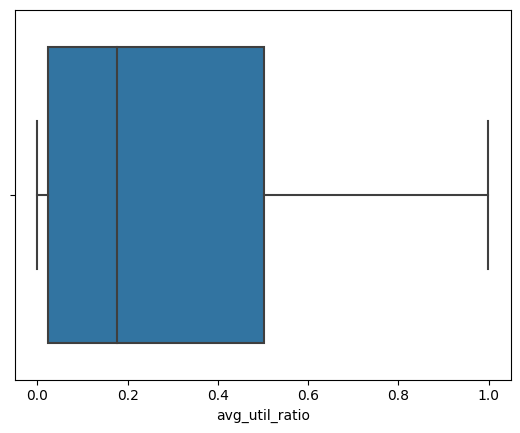

In [18]:
# Creating a box plot to detect outliers
sns.boxplot(x=credit_df_eda["avg_util_ratio"])

In [19]:
# Determining the upper and lower limit of valid credit limit by Tukey's method
lower_limit = 0.023 - (1.5 * 0.023) # the lower limit of valid credit limits
upper_limit = 0.503 + (1.5 * 0.503) # the upper limit of valid credit limits

# Filtering all records that fall outside the limits
credit_df_eda[(credit_df_eda["avg_util_ratio"] < lower_limit) | (credit_df_eda["avg_util_ratio"] > upper_limit)]

,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio


# Data Preprocessing  

The first step in preprocessing is to take a peek into the datatypes of the dataset to see if there are any inconsistent values. Querying the datatypes shows that all the numeric columns contain only numeric values, and non numeric columns are of "object" datatype. Since the datatypes are consistent, it makes sense to **start by processing the non-numeric attributes**.

In [20]:
credit_df.dtypes

client_id                                int64
attrition_flag                          object
age                                      int64
gender                                  object
dependents                               int64
education_level                         object
marital_status                          object
income_category                         object
card_category                           object
customer_months                          int64
no_of_affiliated_products                int64
inactive_months_12                       int64
times_contacted_12                       int64
credit_limit                           float64
revolving_balance                        int64
12_month_avg_open_to_buy_credit        float64
Q4_Q1_transaction_amt_change           float64
12_months_transaction_amt_total          int64
12_months_number_of_transactions         int64
Q4_Q1_number_of_transactions_change    float64
avg_util_ratio                         float64
dtype: object

### Preprocessing step 1: Deleting rows with missing values  

The first step in preprocessing is to get rid of rows with missing values

In [21]:
credit_df = credit_df.dropna()

### Preprocessing step 2: Encoding "attrition_flag" (output variable) attribute

Checking the unique values present in the "attrition_flag" column, it is observed that there are only two values, "Existing Customer" and "Attrited Customer". For being able to fit models to this dataset, we should encode these variables into numeric columns.

In [22]:
print(credit_df["attrition_flag"].value_counts())
credit_df["attrition_flag"] = credit_df["attrition_flag"].replace(["Existing Customer", "Attrited Customer"], [0, 1])
credit_df

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Preprocessing step 3: Encoding the "gender" attribute  

Taking a look at the values in the "gender" attribute, it is observed that there are only two values - "M" (corresponding to male) and "F" (corresponding to female). Similar to the last step, the data in this column needs to be encoded into numerical data.

In [23]:
print(credit_df["gender"].value_counts())
credit_df["gender"] = credit_df["gender"].replace(["M", "F"], [1, 0])
credit_df

F    5358
M    4769
Name: gender, dtype: int64


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,0,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Preprocessing step 4: Handling "Unknown" values in the education_level column using mode injection

In the dataset, there are 1519 rows containing the value of education_level as "Unknown". Since the column is a categorical attribute, it needs to be encoded. The education_level attribute is an ordinal attribute, and so "Unknown" values should be appropriately handled before fitting any model to the data. One method is to replace "Unknown" values with the value that most frequently occurs in that attribute.

In [24]:
# The most frequently occuring value is "Graduate". Therefore, the "Unknown" values are replaced by "Graduate"

print(credit_df["education_level"].value_counts())
credit_df["education_level"] = credit_df["education_level"].replace(["Unknown"], ["Graduate"])
credit_df

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,0,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,Graduate,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Preprocessing step 5: Label encoding education_level attribute

Label encoding our education_level allows us to encode the feature in a logical sequence

In [25]:
credit_df["education_level"] = credit_df["education_level"].replace(["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"], [0, 1, 2, 3, 4, 5])
credit_df

,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,0,45,1,3,1,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,3,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,1,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,3,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Preprocessing step 6: Handling "Unknown" values in the marital_status column using mode injection

In the dataset, there are 749 rows containing the value of marital_status as "Unknown". Since the column is a categorical attribute, it needs to be encoded. One method is to replace "Unknown" values with the value that most frequently occurs in that attribute.

In [26]:
# The most frequently occuring value is "Married". Therefore, the "Unknown" values are replaced by "Married"
credit_df["marital_status"].value_counts()

credit_df["marital_status"] = credit_df["marital_status"].replace(["Unknown"], ["Married"])
credit_df

,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio
0,768805383,0,45,1,3,1,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,Married,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,3,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,1,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,3,Married,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Preprocessing step 7: One-Hot Encoding of marital_status

In the dataset, marital_status is a non-ordinal categorical variable. There are primarily two values associated with an individual's marital status. A new column, "is_married" can be created, to indicate whether a person is married or not. This new column can be used for training classification models.

In [27]:
print(credit_df["marital_status"].value_counts())
credit_df["is_married"] = credit_df["marital_status"].apply(lambda ip : 1 if ip == "Married" else (0 if ip == "Divorced" else 0))
credit_df

Married     5436
Single      3943
Divorced     748
Name: marital_status, dtype: int64


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio,is_married
0,768805383,0,45,1,3,1,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,0,49,0,5,3,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,0,51,1,3,3,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,0,40,0,4,1,Married,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,0,40,1,3,0,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,1,41,1,2,3,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,716506083,1,44,0,1,1,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,717406983,1,30,1,2,3,Married,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


### Preprocessing step 8: Handling "Unknown" values in the income_category using the values from credit_limit column

Since in the real world, credit limit is highly dependent on income, there is scope to use the income_category column to handle "Unknown" values in the income_category table. Intuitively, it makes sense to look at the average credit_limit in each income category. Now, based on the values of mean credit_limit for each income category, each "Unknown" income_category can be categoriezed based on which mean it is closest to.

In [28]:
# Checking values present in income category column
print(str(credit_df["income_category"].value_counts()) + "\n")

# Finding average credit_limit for each income category other than unknown
temp_df = credit_df[credit_df["income_category"] != "Unknown"]
print(temp_df.groupby(["income_category"], as_index = False)["credit_limit"].agg("mean").sort_values(by = "credit_limit"))

def find_min_diff(credit_limit):
    min_diff = 100000
    index = None
    avg_cred_scores = [3754.404521, 5462.259832, 10758.772967, 15809.890945, 19717.322558]
    for i in range(0, 5):
        if(abs(credit_limit - avg_cred_scores[i]) < min_diff):
            min_diff = abs(credit_limit - avg_cred_scores[i])
            index = i
    if(index == 0):
        return "Less than $40K"
    elif(index == 1):
        return "$40K - $60K"
    elif(index == 2):
        return "$60K - $80K"
    elif(index == 3):
        return "$80K - $120K"
    else:
        return "$120K +"
            

credit_df["updated_income_category"] = credit_df["credit_limit"].apply(lambda ip : find_min_diff(ip))
credit_df["updated_income_category"] = np.where(credit_df["income_category"] != "Unknown", credit_df["income_category"], credit_df["updated_income_category"])
credit_df

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

  income_category  credit_limit
4  Less than $40K   3754.404521
1     $40K - $60K   5462.259832
2     $60K - $80K  10758.772967
3    $80K - $120K  15809.890945
0         $120K +  19717.322558


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio,is_married,updated_income_category
0,768805383,0,45,1,3,1,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,$60K - $80K
1,818770008,0,49,0,5,3,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,Less than $40K
2,713982108,0,51,1,3,3,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,$80K - $120K
3,769911858,0,40,0,4,1,Married,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,Less than $40K
4,709106358,0,40,1,3,0,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,$60K - $80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,$40K - $60K
10123,710638233,1,41,1,2,3,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,$40K - $60K
10124,716506083,1,44,0,1,1,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,Less than $40K
10125,717406983,1,30,1,2,3,Married,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,$40K - $60K


### Preprocessing step 9: Label encoding updated income category attribute

Now that the "Unknown" values of income category are handled, the attribute can be label encoded. An approach similar to step 5 can be followed.

In [29]:
credit_df["income_category"] = credit_df["updated_income_category"].apply(lambda ip : 1 if ip == "Less than $40K" else (2 if ip == "$40K - $60K" else (3 if ip == "$60K - $80K" else (4 if ip == "$80K - $120K" else 5))))
credit_df

,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio,is_married,updated_income_category
0,768805383,0,45,1,3,1,Married,3,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,$60K - $80K
1,818770008,0,49,0,5,3,Single,1,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,Less than $40K
2,713982108,0,51,1,3,3,Married,4,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,$80K - $120K
3,769911858,0,40,0,4,1,Married,1,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,Less than $40K
4,709106358,0,40,1,3,0,Married,3,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,$60K - $80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,2,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,$40K - $60K
10123,710638233,1,41,1,2,3,Divorced,2,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,$40K - $60K
10124,716506083,1,44,0,1,1,Married,1,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,Less than $40K
10125,717406983,1,30,1,2,3,Married,2,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,$40K - $60K


### Preprocessing step 10: Label encoding card_category

The card_category variable is an ordinal categorical variable that can be label encoded simialar to the updated income category attribute and the education_level attribute.

In [30]:
print(credit_df["card_category"].value_counts())
credit_df["card_category"] = credit_df["card_category"].replace(["Blue", "Silver", "Gold", "Platinum"], [1, 2, 3, 4])
credit_df

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64


,client_id,attrition_flag,age,gender,dependents,education_level,marital_status,income_category,card_category,customer_months,...,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio,is_married,updated_income_category
0,768805383,0,45,1,3,1,Married,3,1,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,$60K - $80K
1,818770008,0,49,0,5,3,Single,1,1,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,Less than $40K
2,713982108,0,51,1,3,3,Married,4,1,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,$80K - $120K
3,769911858,0,40,0,4,1,Married,1,1,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,Less than $40K
4,709106358,0,40,1,3,0,Married,3,1,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,$60K - $80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,Single,2,1,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,$40K - $60K
10123,710638233,1,41,1,2,3,Divorced,2,1,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,$40K - $60K
10124,716506083,1,44,0,1,1,Married,1,1,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,Less than $40K
10125,717406983,1,30,1,2,3,Married,2,1,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,$40K - $60K


### Preprocessing step 11: Selecting relevant columns and normalizing the dataset

Now that the categorical variables have been encoded, the next step is to choose the relevant columns and scale the dataset so that it may be used for model building

In [31]:
y = credit_df["attrition_flag"]

credit_df = credit_df[['age', 'gender', 'dependents',
       'education_level', 'income_category', 'card_category',
       'customer_months', 'no_of_affiliated_products', 'inactive_months_12',
       'times_contacted_12', 'credit_limit', 'revolving_balance',
       '12_month_avg_open_to_buy_credit', 'Q4_Q1_transaction_amt_change',
       '12_months_transaction_amt_total', '12_months_number_of_transactions',
       'Q4_Q1_number_of_transactions_change', 'avg_util_ratio', 'is_married']]


# Q4_Q1_transaction_amt_change : Transaction amount change from last quarter


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_df = pd.DataFrame(scaler.fit_transform(credit_df), columns = credit_df.columns)
credit_df

,age,gender,dependents,education_level,income_category,card_category,customer_months,no_of_affiliated_products,inactive_months_12,times_contacted_12,credit_limit,revolving_balance,12_month_avg_open_to_buy_credit,Q4_Q1_transaction_amt_change,12_months_transaction_amt_total,12_months_number_of_transactions,Q4_Q1_number_of_transactions_change,avg_util_ratio,is_married
0,-0.165406,1.059956,0.503368,-0.893680,0.475988,-0.250587,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.928951
1,0.333570,-0.943436,2.043199,0.593388,-0.987378,-0.250587,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-1.076483
2,0.583058,1.059956,0.503368,0.593388,1.207670,-0.250587,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.928951
3,-0.789126,-0.943436,1.273283,-0.893680,-0.987378,-0.250587,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0.928951
4,-0.789126,1.059956,0.503368,-1.637214,0.475988,-0.250587,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0.928951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.593388,-0.255695,-0.250587,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,-1.076483
10123,-0.664382,1.059956,-0.266547,0.593388,-0.255695,-0.250587,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,-1.076483
10124,-0.290150,-0.943436,-1.036462,-0.893680,-0.987378,-0.250587,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,0.928951
10125,-2.036565,1.059956,-0.266547,0.593388,-0.255695,-0.250587,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,0.928951


# STAGE 2: MACHINE LEARNING AND STATISTICAL ANALYSIS

# Algorithm 1: K-NN Algorithm

In [33]:
# Importing the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the dataset into test and train
X = credit_df.drop(["customer_months"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Defining the KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Calculating the metrics for the model
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print('Accuracy: ' + str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9032576505429417
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1678
           1       0.84      0.54      0.66       348

    accuracy                           0.90      2026
   macro avg       0.87      0.76      0.80      2026
weighted avg       0.90      0.90      0.89      2026



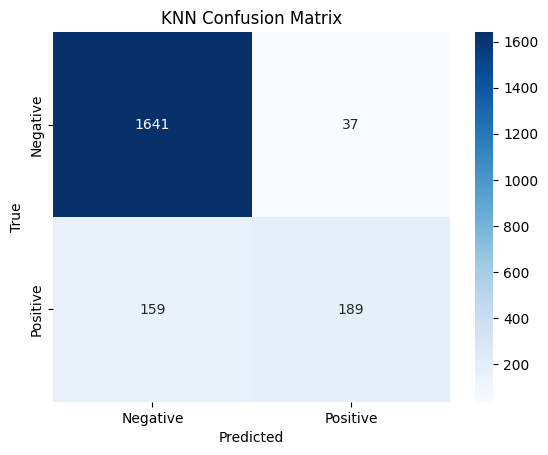

In [34]:
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")

# Generating the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.xticks([0.5,1.5], ['Negative', 'Positive'])
plt.yticks([0.5,1.5], ['Negative', 'Positive'])
plt.show()

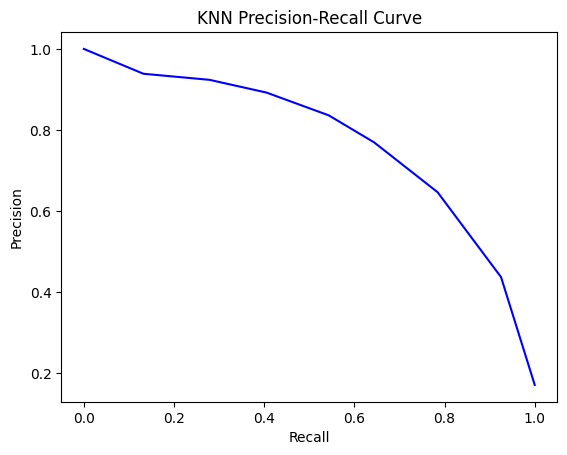

In [35]:
from sklearn.metrics import precision_recall_curve

# Calculating the affiliated probabilities
y_probabilites = knn.predict_proba(X_test)[:, 1]

# Generating precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probabilites)

# Plotting the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Precision-Recall Curve')
plt.show()

# Algorithm 2: Naive Bayes Classifier

In [36]:
# importing the required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Creating an instance of the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Dropping columns and splitting the data into test and train
X = credit_df.drop(["12_months_transaction_amt_total"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Fitting the model
gnb.fit(X_train, y_train)

# Generating y_pred values with our model
y_pred = gnb.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.8904244817374136
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1678
           1       0.73      0.58      0.64       348

    accuracy                           0.89      2026
   macro avg       0.82      0.77      0.79      2026
weighted avg       0.88      0.89      0.89      2026



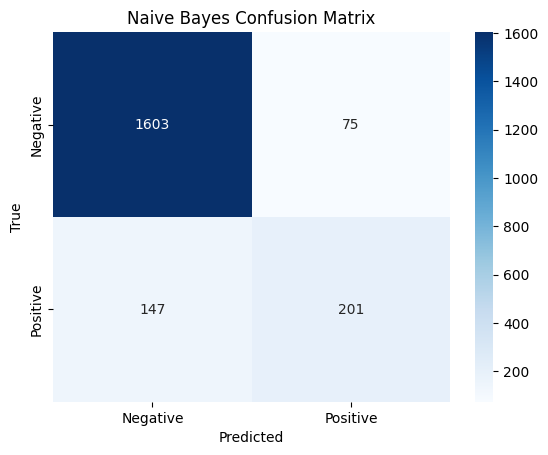

In [37]:
# Generating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")

# Creating the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.xticks([0.5,1.5], ['Negative', 'Positive'])
plt.yticks([0.5,1.5], ['Negative', 'Positive'])
plt.show()

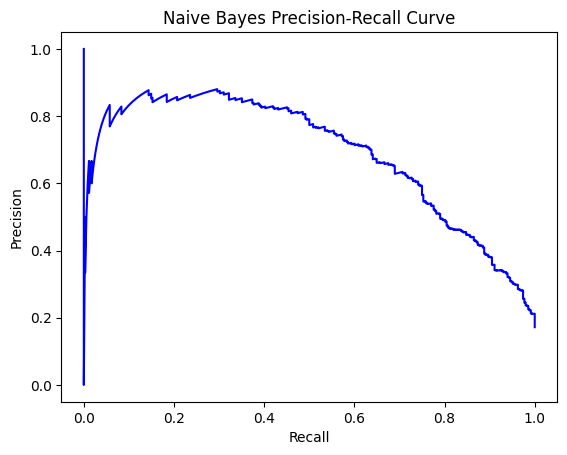

In [38]:
# Calculating the affiliated probabilities
y_scores = gnb.predict_proba(X_test)[:, 1]

# Generating precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision-Recall Curve')
plt.show()

# Algorithm 3: Support Vector Machine

In [39]:
# Importing the required libraries
from sklearn.svm import SVC

# Dropping columns and splitting the data into test and train datasets
X = credit_df.drop(["customer_months"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Creating SVM with hyperparameters
svm = SVC(kernel='rbf', tol = 0.0002)

# Fitting the model
svm.fit(X_train, y_train)

# Generating the y_pred values
y_pred = svm.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9299111549851925
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1678
           1       0.88      0.69      0.77       348

    accuracy                           0.93      2026
   macro avg       0.91      0.83      0.87      2026
weighted avg       0.93      0.93      0.93      2026



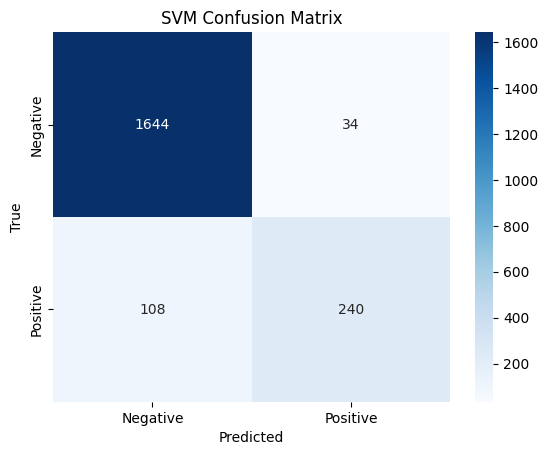

In [40]:
# Generating y_pred values
y_pred = svm.predict(X_test)

# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")

# Add labels, title and ticks to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.xticks([0.5,1.5], ['Negative', 'Positive'])
plt.yticks([0.5,1.5], ['Negative', 'Positive'])

# Show the plot
plt.show()

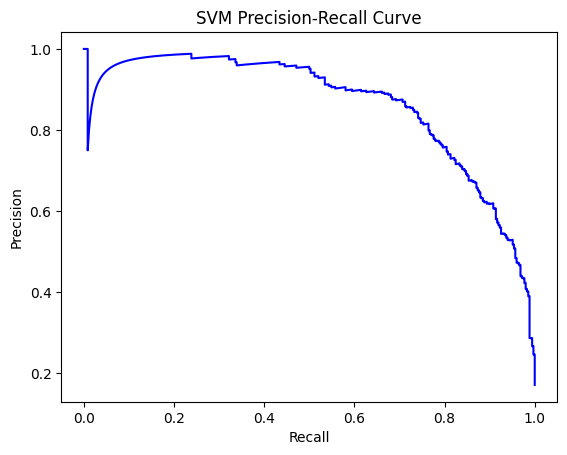

In [41]:
# Creating predictions
y_scores = svm.decision_function(X_test)

# Getting precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.show()

# Algorithm 4: MLP Classifier

In [42]:
# Importing the required libraries
from sklearn.neural_network import MLPClassifier

# Creating the neural network
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000, alpha=0.02, activation=('logistic'))

# Training the neural network
X = credit_df.drop(["customer_months"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)
nn.fit(X_train, y_train)

# Making predictions
y_pred = nn.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9442250740375123
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1678
           1       0.86      0.80      0.83       348

    accuracy                           0.94      2026
   macro avg       0.91      0.89      0.90      2026
weighted avg       0.94      0.94      0.94      2026



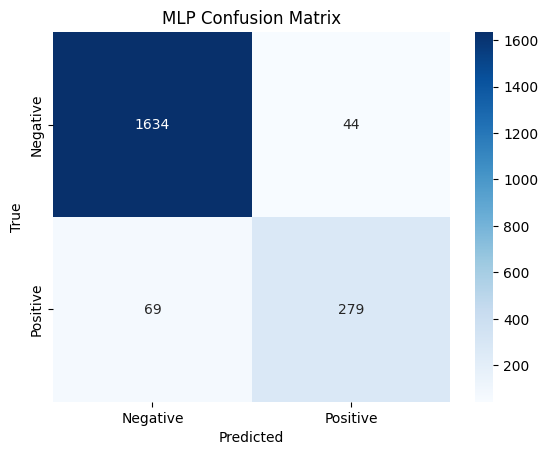

In [43]:
# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")

# Plotting confusion matrix
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix')
plt.xticks([0.5,1.5], ['Negative', 'Positive'])
plt.yticks([0.5,1.5], ['Negative', 'Positive'])
plt.show()

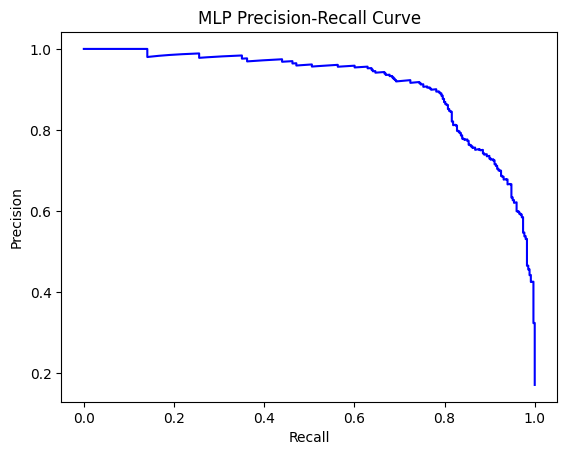

In [44]:
# Generating predictions using neural network
y_scores = nn.predict_proba(X_test)[:, 1]

# Generating precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MLP Precision-Recall Curve')
plt.show()

# Algorithm 5: Logistic Regression

In [45]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression

# Dropping columns and splitting the data into training and testing sets
X = credit_df.drop(["12_months_transaction_amt_total"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
logreg = LogisticRegression()

# Fitting the model to trainnig data
logreg.fit(X_train, y_train)

# Generating predictions
y_pred = logreg.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.8904244817374136
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1699
           1       0.75      0.48      0.58       327

    accuracy                           0.89      2026
   macro avg       0.83      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026



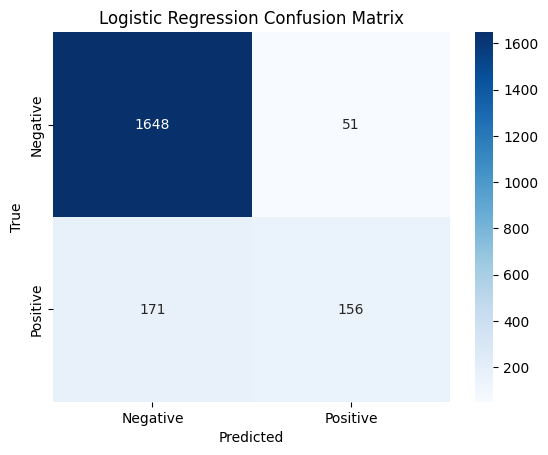

In [46]:
# Generating predictions using your classifier
y_pred = logreg.predict(X_test)

# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Creating a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")

# Showing the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.xticks([0.5,1.5], ['Negative', 'Positive'])
plt.yticks([0.5,1.5], ['Negative', 'Positive'])
plt.show()

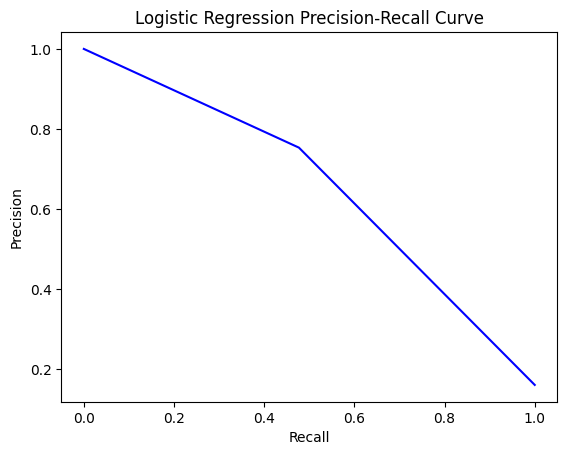

In [47]:
# Generate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')

# Show the plot
plt.show()